<a href="https://colab.research.google.com/github/ooootaaaa/DeepLearning2022Late/blob/main/0927%5BDogVsCat2022%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Kerasを使用したディープラーニングをやってみる
##画像認識を行う

###ライブラリの読み込み

In [1]:
%matplotlib inline
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from keras.preprocessing import image
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import sys

###学習済みモデルの読み込み

In [2]:
model = VGG16(weights = 'imagenet')

###画像判定のための関数

In [3]:
from numpy.core.multiarray import result_type
def predict(filename, featuresize):
  img = image.load_img(filename, target_size=(224,224))
  x = image.img_to_array(img)
  x = np.expand_dims(x,axis=0)
  #学習モデルで判定を実行
  preds = model.predict(preprocess_input(x))
  results = decode_predictions(preds,top=featuresize)[0]
  return results
  #関数終わり

###画像表示のための関数


In [4]:
def showimg(filename, title, i):
  im = Image.open(filename)#画像ファイルを開く
  im_list = np.array(im)#画像ビットでーたをndarrayにする
  plt.subplot(2,5,i)
  plt.title(title)
  plt.axis("off")
  plt.imshow(im_list)
  #関数終わり

##Kaggeにある画像データを利用する
https://www.kaggle.com/
<br>犬猫判定用の画像データ</br>
https://www.kaggle.com/c/dogs-vs-cats/data

##指定されたURLからファイルをダウンロードする

In [5]:
# wgetでwebからファイルをダウンロードする
# GoogleColabでコマンドを実行するときは、先頭に!マークを必ずつけること
#小さいファイルをGoogleドライブからDLする時は、以下のようにURLをつけるだけでOK！

!wget --load-cookies /tmp/cookies.txt "https://drive.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://drive.google.com/uc?export=download&id=1WQ9KZ-St4BqUWkqYJZYBIXQ8tT92DW_2' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1WQ9KZ-St4BqUWkqYJZYBIXQ8tT92DW_2" -O train.zip && rm -rf /tmp/cookies.txt
!wget --load-cookies /tmp/cookies.txt "https://drive.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://drive.google.com/uc?export=download&id=1WQ9KZ-St4BqUWkqYJZYBIXQ8tT92DW_2' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1WQ9KZ-St4BqUWkqYJZYBIXQ8tT92DW_2" -O test.zip && rm -rf /tmp/cookies.txt



--2022-10-04 00:48:42--  https://drive.google.com/uc?export=download&confirm=t&id=1WQ9KZ-St4BqUWkqYJZYBIXQ8tT92DW_2
Resolving drive.google.com (drive.google.com)... 74.125.23.113, 74.125.23.100, 74.125.23.138, ...
Connecting to drive.google.com (drive.google.com)|74.125.23.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-1s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/cc2q1rntvvqnddgkab6toff15ce2eps7/1664844450000/14334177730080324288/*/1WQ9KZ-St4BqUWkqYJZYBIXQ8tT92DW_2?e=download&uuid=010fac30-11dd-4c27-81e3-b9f9f03e78e5 [following]
--2022-10-04 00:48:42--  https://doc-0k-1s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/cc2q1rntvvqnddgkab6toff15ce2eps7/1664844450000/14334177730080324288/*/1WQ9KZ-St4BqUWkqYJZYBIXQ8tT92DW_2?e=download&uuid=010fac30-11dd-4c27-81e3-b9f9f03e78e5
Resolving doc-0k-1s-docs.googleusercontent.com (doc-0k-1s-docs.googleusercontent.com)... 142.250.157.132

##Colabに自分のGoogleアカウントのドライブをマウント

In [6]:
#googleドライブを操作するモジュールをimport
from google.colab import drive
#googleドライブをマウント
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##DLしてきたファイルをマウントしたディレクトリにコピーする


In [7]:
#　コピーファイルを置くディレクトリを作る
import os 
dir_path = "/content/dirive/My Drive/2022LATE"
#すでにディレクトリがあってもエラに使用
os.makedirs(dir_path,exist_ok = True)
!pwd #今いるディレクトリを表示
#ファイルをコピー
!cp train.zip "/content/drive/My Drive/2022LATE"
#test.zip はいったん使わないのでコピーしない

/content


#Google ドライブからColabへファイルをコピー

In [8]:
!cp "/content/drive/My Drive/2022LATE/train.zip"

cp: missing destination file operand after '/content/drive/My Drive/2022LATE/train.zip'
Try 'cp --help' for more information.


##zipファイルを解凍する

In [9]:
#unzipコマンドで解凍
!unzip -o -q "train.zip"
print("zip解凍完了")

zip解凍完了


##解凍した画像を使って画像判定させる

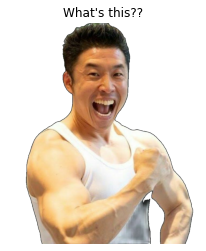

('n03888605', 'parallel_bars', 0.528502)
('n03535780', 'horizontal_bar', 0.3825556)
('n02777292', 'balance_beam', 0.029171305)
('n03255030', 'dumbbell', 0.008938877)
('n02790996', 'barbell', 0.006298535)
('n03942813', 'ping-pong_ball', 0.003910068)
('n03832673', 'notebook', 0.0030498945)
('n04409515', 'tennis_ball', 0.0026656175)
('n04540053', 'volleyball', 0.0019229518)
('n03594734', 'jean', 0.0014506393)


In [11]:
#画像を指定する変数
# filename = "train/cat.100.jpg"
filename = "kin.png"

plt.figure(figsize=(20,10))
for i in range(1):
  showimg (filename, "What's this??", i+1)
#ループ終わり
plt.show()

#表示した画像を判定
results = predict(filename, 10)
for result in results:
  print(result)